In [ ]:
from google.colab import files
import pandas as pd
import io
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [ ]:
#uploaded_file = files.upload()

In [ ]:
#!curl -L -o /content/sample_data/salary-dataset-simple-linear-regression.zip \
#https://www.kaggle.com/api/v1/datasets/download/abhishek14398/salary-dataset-simple-linear-regression

In [ ]:
#!unzip /content/sample_data/salary-dataset-simple-linear-regression.zip

In [ ]:
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
df.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [ ]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

O coeficiente de correlação de Pearson é: 0.9782


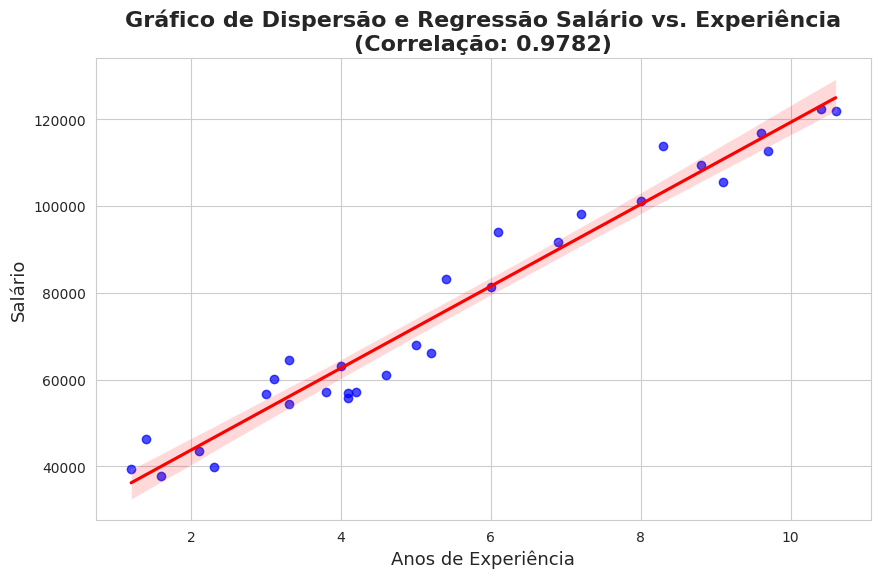

In [ ]:
# Pré-processamento: Remover a coluna desnecessária 'Unnamed: 0'
# Esta coluna é um resquício de indexação.
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Calcular o coeficiente de correlação (para incluir no título)
correlation = df['YearsExperience'].corr(df['Salary'])

# Configuração do estilo e tamanho do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))


sns.regplot(
    x='YearsExperience',
    y='Salary',
    data=df,
    scatter_kws={'color': 'blue', 'alpha': 0.7}, # Estilos para os pontos
    line_kws={'color': 'red'}                    # Estilos para a linha de regressão
)


plt.title(f'Gráfico de Dispersão e Regressão Salário vs. Experiência\n(Correlação: {correlation:.4f})',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Anos de Experiência', fontsize=13)
plt.ylabel('Salário', fontsize=13)

# plt.show() # Para exibir o gráfico em ambiente Colab/Jupyter

print(f"O coeficiente de correlação de Pearson é: {correlation:.4f}")

**Correlação alta e quase perfeita. Se espera um modelo com um erro bastante insignificante na modelagem**

In [ ]:
X = df[['YearsExperience']]
y = df['Salary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg_predict = reg.predict(X_test)

In [ ]:
reg_predict

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

In [ ]:
resultados = pd.DataFrame()

In [ ]:
resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [ ]:
resultados.head()

,revenue,predict,erro
27,112636.0,115791.210113,3155.210113
15,67939.0,71499.278095,3560.278095
23,113813.0,102597.868661,-11215.131339
17,83089.0,75268.804224,-7820.195776
8,64446.0,55478.792045,-8967.207955


In [ ]:
resultados[resultados.revenue > 0]

,revenue,predict,erro
27,112636.0,115791.210113,3155.210113
15,67939.0,71499.278095,3560.278095
23,113813.0,102597.868661,-11215.131339
17,83089.0,75268.804224,-7820.195776
8,64446.0,55478.792045,-8967.207955
9,57190.0,60190.699707,3000.699707


In [ ]:
(reg_predict - y_test)**2

,Salary
27,9.955351e+06
15,1.267558e+07
23,1.257792e+08
17,6.115546e+07
8,8.041082e+07
9,9.004199e+06


# MSE

In [ ]:
np.mean((reg_predict - y_test)**2)

np.float64(49830096.855908394)

# RMSE

In [ ]:
np.sqrt(np.mean((reg_predict - y_test)**2))

np.float64(7059.04362190151)

In [ ]:
np.sqrt(mean_squared_error(y_test, reg_predict))

np.float64(7059.04362190151)

In [ ]:
np.mean(df.Salary) # Média do salário em nossa base

np.float64(76004.0)

In [ ]:
np.std(df.Salary) # Desvio do salário em nossa base

26953.65024877583

**É bom que nosso modelo erre menos que o desvio padrão e isso é real, então temos um modelo muito bom dadas como esperado quando temos uma correlação linear tão alta entre as variáveis.**

# Análise Gráfica

<Axes: >

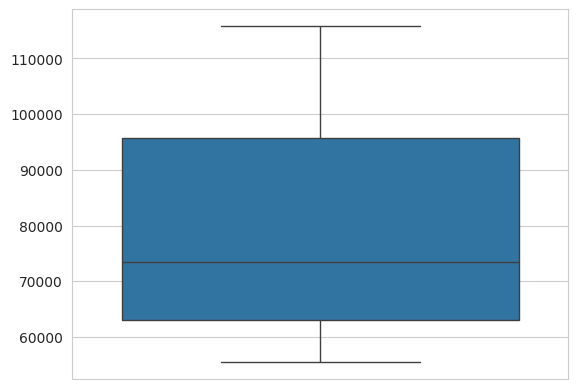

In [ ]:
sns.boxplot(reg_predict)
# É possível ver aqui que os dados se distribuem como imaginamos olhando para a mediana e os intervalos dentro de valores

<Axes: ylabel='Salary'>

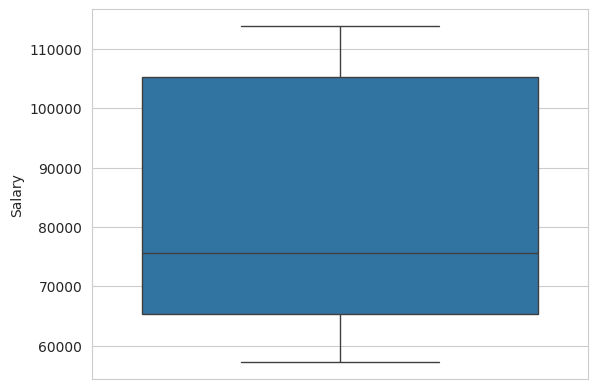

In [ ]:
sns.boxplot(y_test)
# Está suficientemente coerente com a previsão do nosso modelo